In [42]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nyc_data.csv", index_col = 0, parse_dates = True)
#For TS it is usual to have have date as index. In the data col 0 is the date
#parse_dates will set the date to YYYY-MM-DD
df

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077
...,...,...,...,...,...,...
2020-12-27,685.915026,0,0,0,2.89,38.674
2020-12-28,998.051170,0,0,0,8.83,166.712
2020-12-29,847.123399,0,0,0,3.48,161.865


In [3]:
df = df.rename(columns={"Demand" : "y"})
df.head(5)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [4]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


![Additive Vs Multiplicative](img/AdditiveVSMultiplicative.PNG "Additive Vs Multiplicative")


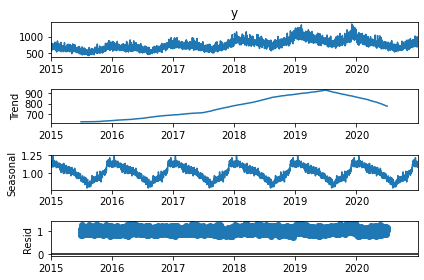

In [6]:
decomposition = seasonal_decompose(x = df.y,
                                   model = 'multiplicative',
                                   period = 365)
decomposition.plot();

<AxesSubplot: xlabel='Date'>

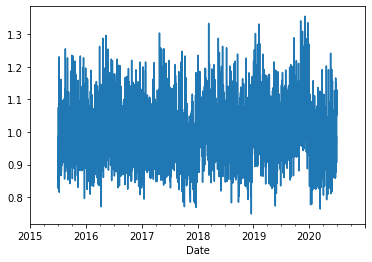

In [7]:
decomposition.resid.plot()

# Seasonal Graphs

Data is daily but we can convert to monthly

In [9]:
monthly_data = df.y.resample(rule = "MS").mean()
monthly_data

Date
2015-01-01    692.967611
2015-02-01    676.381042
2015-03-01    646.326069
2015-04-01    636.463333
2015-05-01    621.211624
                 ...    
2020-08-01    642.785119
2020-09-01    673.093698
2020-10-01    719.514838
2020-11-01    745.599826
2020-12-01    832.963040
Freq: MS, Name: y, Length: 72, dtype: float64

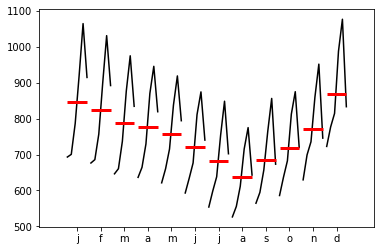

In [11]:
month_plot(monthly_data);

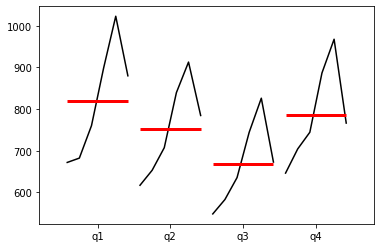

In [13]:
quarter_plot(df.y.resample(rule = "Q").mean());

## Advanced visualization

In [15]:
df_plot = df.copy()

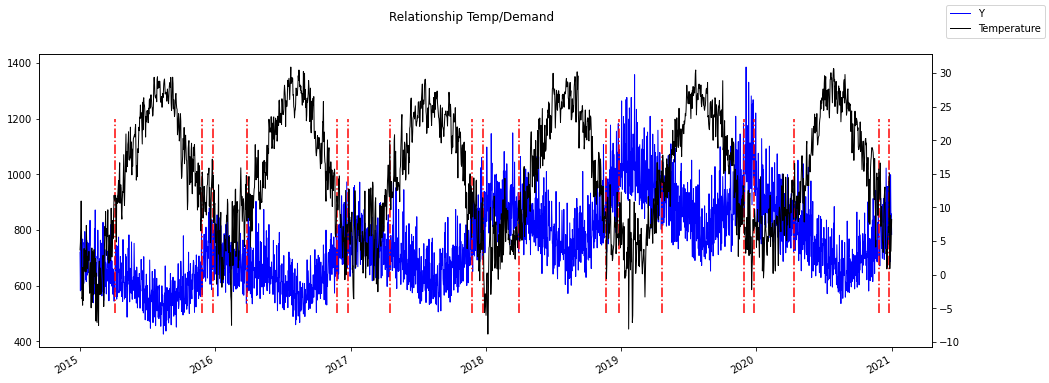

In [36]:
#Colors
temp_color = "black"
y_color = "blue"

#plot
fig, ax1 = plt.subplots(figsize = (16, 6))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1, label = "Y")
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1, label = "Temperature")

fig.suptitle("Relationship Temp/Demand")
fig.legend()
fig.autofmt_xdate()

# Add holidays
holidays_dates = df_plot.query("Easter == 1 or Thanksgiving == 1 or Christmas == 1").index
ax1.vlines(x = holidays_dates, ymin = 500, ymax = 1200, colors = ["red"], ls = "dashdot")



In [28]:
df_plot.columns

Index(['y', 'Easter', 'Thanksgiving', 'Christmas', 'Temperature', 'Marketing'], dtype='object')

In [30]:
holidays_dates = df_plot.query("Easter == 1 or Thanksgiving == 1 or Christmas == 1").index
holidays_dates

DatetimeIndex(['2015-04-05', '2015-11-26', '2015-12-25', '2016-03-27',
               '2016-11-24', '2016-12-25', '2017-04-16', '2017-11-23',
               '2017-12-25', '2018-04-01', '2018-11-22', '2018-12-25',
               '2019-04-21', '2019-11-28', '2019-12-25', '2020-04-12',
               '2020-11-26', '2020-12-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [41]:
# CORRELETION

df[["y", "Temperature"]].corr()

#When temp is higher, y decreases and viceversa

df[["y", "Temperature", "Marketing"]].corr()

#Marketing has positive corr with Y instead

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


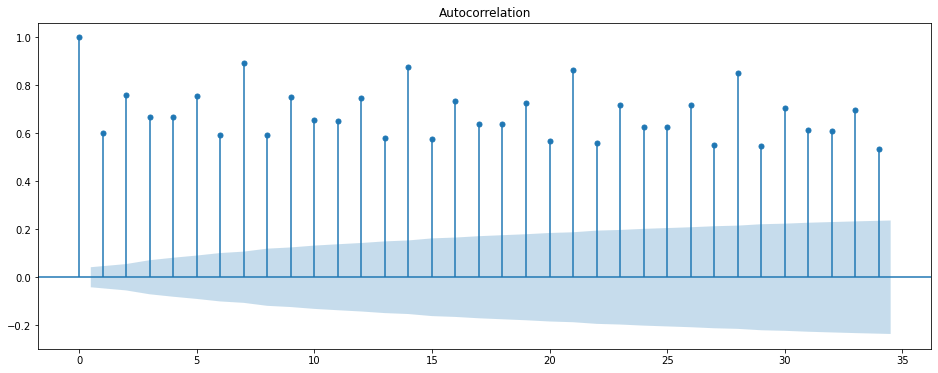

In [45]:
plt.rcParams["figure.figsize"] = (16,6)
plot_acf(df.y)
plt.show();

There is a high correlation, information in the past to predict the future. There is a sort of seasonality for exampl every 7 days. First day is always 1. 